# Cucumber Profiling Results

### Sanitary Checks Stage

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [3]:
sanity_values = np.loadtxt("sanity_checks.values")
core_values = np.loadtxt("core.values")
init_client_values = np.loadtxt("init_client.values")
reposync_values = np.loadtxt("reposync.values")
secondary_values = np.loadtxt("secondary.values")
finishing_values = np.loadtxt("finishing.values")

every_value = np.loadtxt("all.values")

# Lables for time intervals
labels = ['t < 1', '1 < t < 5', '5 < t < 30', '30 < t < 60', '60 < t < 300', ' t > 300' ]
x_pos = np.arange(len(labels))

In [4]:
def value_repartition(current_array) :
    low_values = ((0 <= current_array) & (current_array < 1)).sum()
    med_low_values = ((1 <= current_array) & (current_array < 5)).sum()
    medium_values = ((5 <= current_array) & (current_array < 30)).sum()
    med_high_values = ((30 <= current_array) & (current_array < 60)).sum()
    high_values = ((60 <= current_array) & (current_array < 300)).sum()
    very_high_values = (300 <= current_array).sum()
    
    count_array = [low_values, med_low_values, medium_values, med_high_values, high_values, very_high_values]
    return count_array

def mean_values(current_array) :
    low_values = (current_array[(0 <= current_array) & (current_array < 1)]).mean()
    if np.isnan(low_values) : low_values = 0
    med_low_values = (current_array[(1 <= current_array) & (current_array < 5)]).mean()
    if np.isnan(med_low_values) : med_low_values = 0
    medium_values = (current_array[(5 <= current_array) & (current_array < 30)]).mean()
    if np.isnan(medium_values) : medium_values = 0
    med_high_values = (current_array[(30 <= current_array) & (current_array < 60)]).mean()
    if np.isnan(med_high_values) : med_high_values = 0
    high_values = (current_array[(60 <= current_array) & (current_array < 300)]).mean()
    if np.isnan(high_values) : high_values = 0
    very_high_values = (current_array[(300 <= current_array)]).mean()
    if np.isnan(very_high_values) : very_high_values = 0
    
    count_array = [low_values, med_low_values, medium_values, med_high_values, high_values, very_high_values]
    print(count_array)
    return count_array

36389.9028199


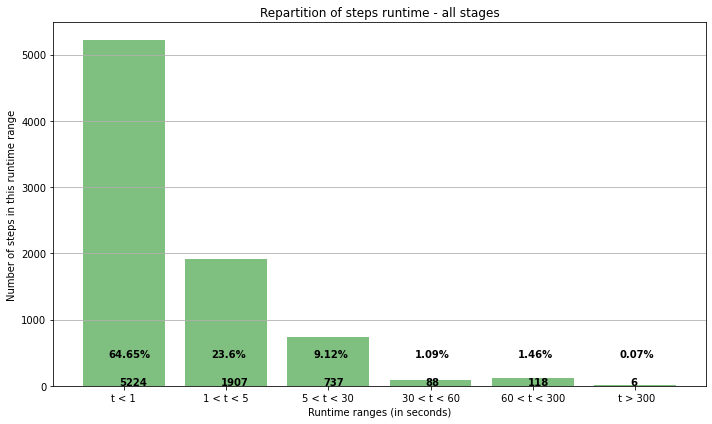

[0.31388512249234307, 1.9378619138437339, 10.421570475033922, 40.66468054318182, 113.87624769745761, 1059.6796190166667]
36389.9028199


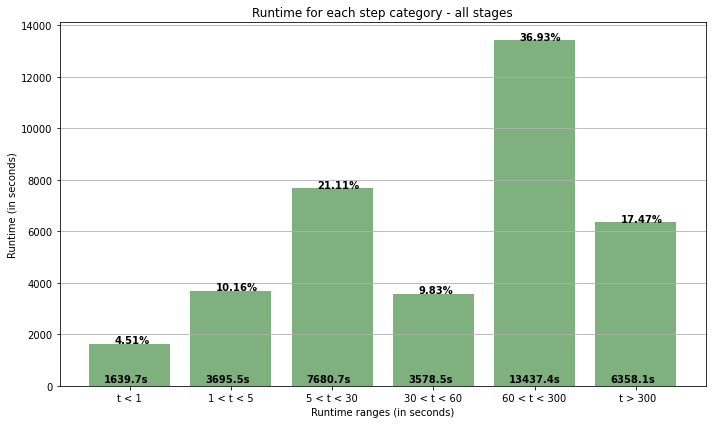

In [5]:
#All values 

# Array of values being currently worked on
current_array = every_value
total_values = current_array.size
total_time = current_array.sum()

print(total_time)

# Compute the runtime repartition
occurences = value_repartition(current_array)

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='green')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - all stages')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_all_steps.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgreen')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - all stages')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')

print(np.sum(runtimes))


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_all_runtimes.png')
plt.show()

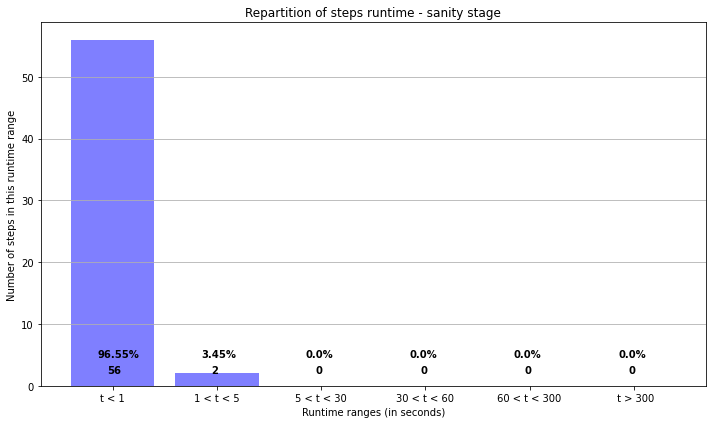

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/home/elarie/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


[0.379067125, 1.23577565, 0, 0, 0, 0]
23.6993103


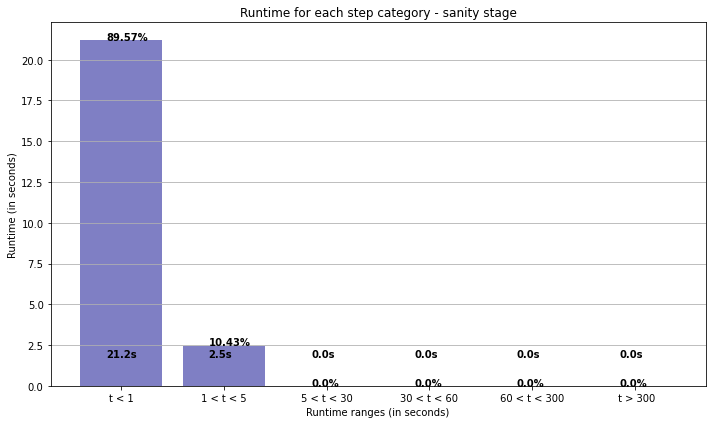

In [6]:
# Sanity stage

# Array of values being currently worked on
current_array = sanity_values
total_values = current_array.size
total_time = current_array.sum()

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='blue')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - sanity stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_sanity_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkblue')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - sanity stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.85, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')
print(np.sum(runtimes))


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_sanity_runtimes.png')
plt.show()

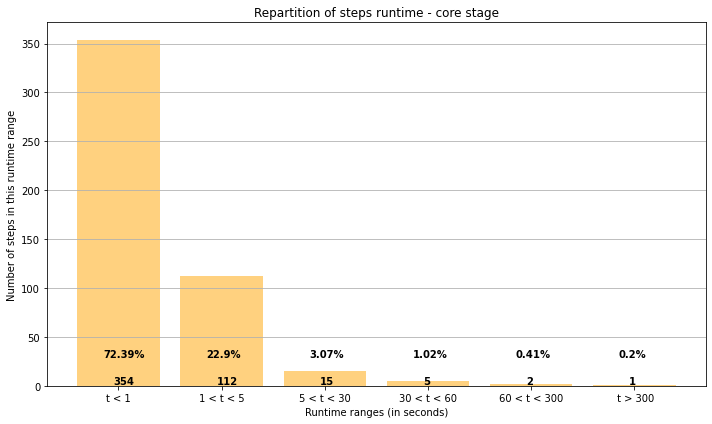

[0.3420858115819209, 1.7311183142857145, 10.7882002, 37.51675186, 120.53995044999999, 700.0005741]
1605.4708658


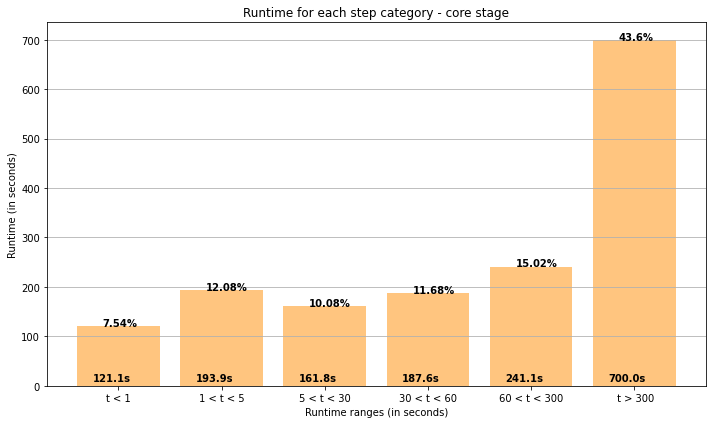

In [7]:
# Core stage

# Array of values being currently worked on
current_array = core_values
total_values = current_array.size
total_time = current_array.sum()

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='orange')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - core stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_core_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkorange')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - core stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')
print(np.sum(runtimes))


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_core_runtimes.png')
plt.show()


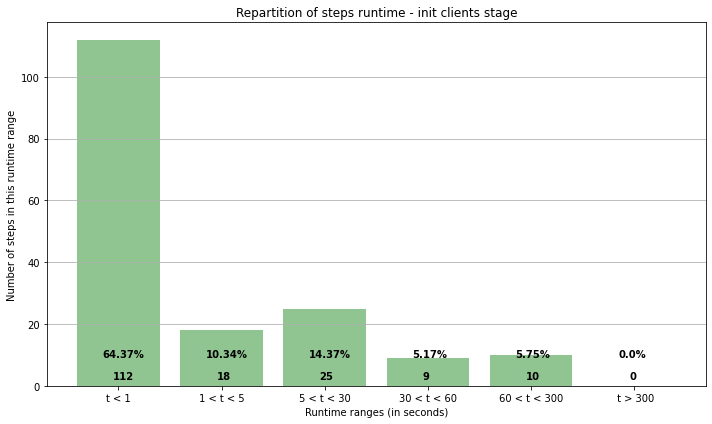

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


[0.3559921723214286, 2.203069661111111, 8.620451112000001, 46.530545833333335, 90.7391335, 0]
1621.2039025


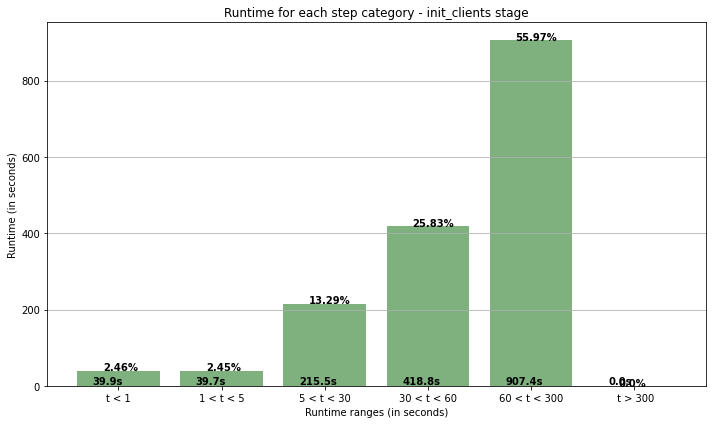

In [8]:
# Init client stage

# Array of values being currently worked on
current_array = init_client_values
total_values = current_array.size
total_time = current_array.sum()

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='forestgreen')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - init clients stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_init_clients_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgreen')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - init_clients stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_init_clients_runtimes.png')
plt.show()

print(np.sum(runtimes))


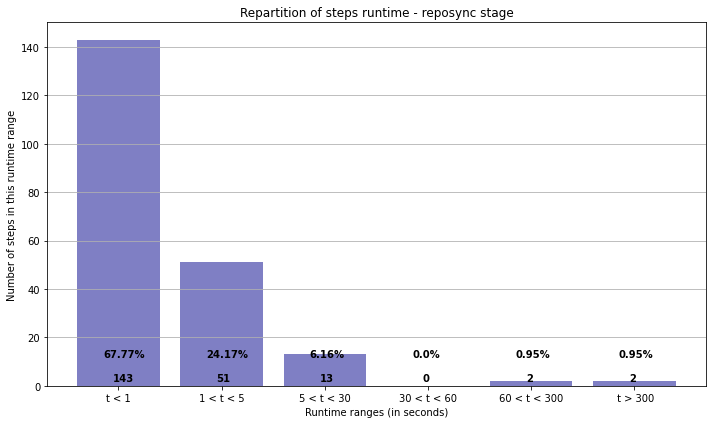

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.


[0.2556347881118881, 2.1785133549019604, 10.357902, 0, 71.63878109999999, 1169.26555925]


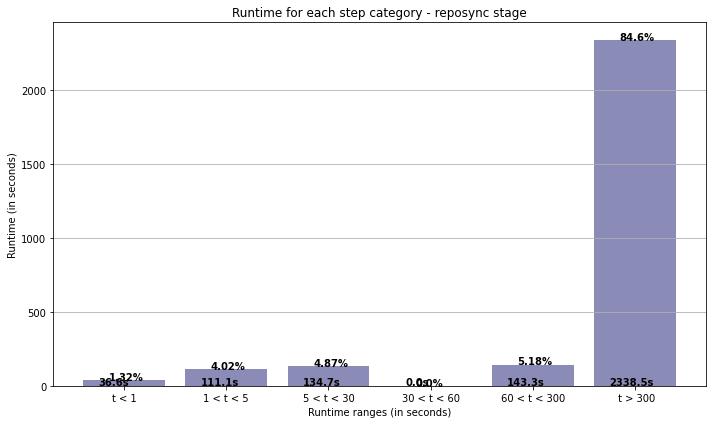

2764.1213625


In [9]:
# Reposync stage

# Array of values being currently worked on
current_array = reposync_values
total_values = current_array.size
total_time = current_array.sum()

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='darkblue')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - reposync stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_reposync_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='midnightblue')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - reposync stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_reposync_runtimes.png')
plt.show()

print(np.sum(runtimes))


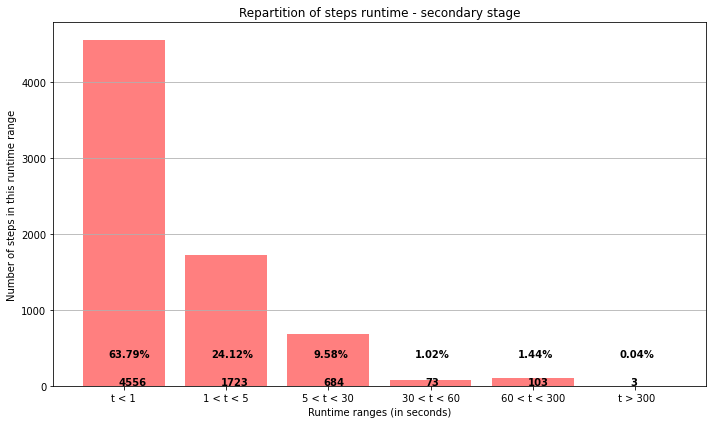

[0.3116521155399473, 1.9418471967498547, 10.480570808918129, 39.90892533835617, 115.77226557766988, 1106.5153404999999]


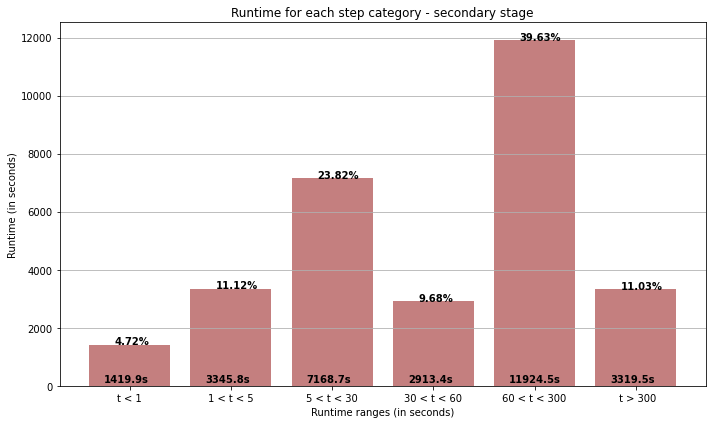

30091.8411174


In [10]:
# Secondary stage

# Array of values being currently worked on
current_array = secondary_values
total_values = current_array.size
total_time = current_array.sum()

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='red')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - secondary stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_secondary_stage.png')
plt.show()


# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkred')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - secondary stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_secondary_runtimes.png')
plt.show()

print(np.sum(runtimes))


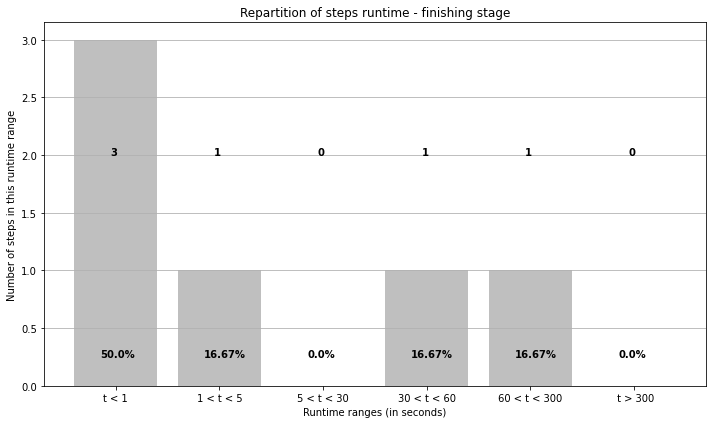

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


[0.36526906666666664, 2.5837122, 0, 58.7816663, 221.1050757, 0]


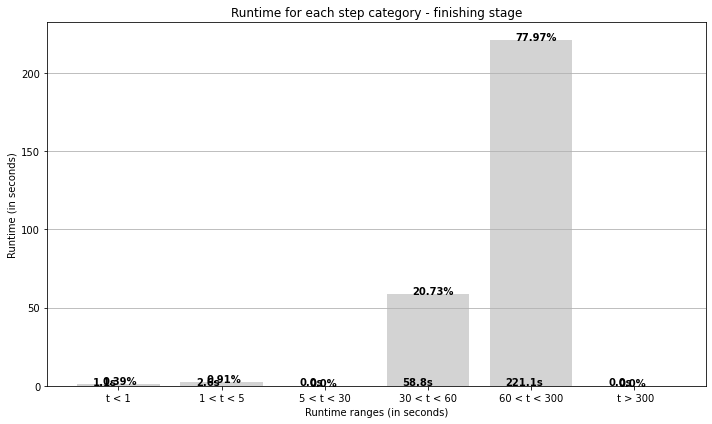

283.5662614


In [11]:
# Finishing stage

# Array of values being currently worked on
current_array = finishing_values
total_values = current_array.size
total_time = current_array.sum()

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='grey')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - finishing stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_finishing_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgrey')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - finishing stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.85, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_finishing_runtimes.png')
plt.show()
print(np.sum(runtimes))


In [12]:
! awk '$1 >= 300.0 ' cleaned.log > very_high_values_values.log
! cat very_high_values_values.log | grep -v ".rb" | wc -l
! cat very_high_values_values.log | grep -v ".rb" | sort

6
 1005.2227495 And I wait until all spacewalk-repo-sync finished # features/reposync/srv_add_rocky8_repositories.feature:55
 1333.3083690 When I kill all running spacewalk-repo-sync, excepted the ones needed to bootstrap # features/reposync/srv_wait_for_reposync.feature:17
 1772.2680558 When I wait until the image build "suse_os_image" is completed # features/secondary/buildhost_osimage_build_image.feature:50
 700.0005741 And I wait for "700" seconds # features/core/proxy_branch_network.feature:200
 768.1878191 And I wait at most 1200 seconds until Salt master sees "pxeboot_minion" as "unaccepted" # features/secondary/proxy_cobbler_pxeboot.feature:89
 779.0901466 And I wait at most 1000 seconds until Salt master sees "test-vm2" as "unaccepted" # features/secondary/minkvm_guests.feature:439


In [11]:
# Analysis of high values (between 60 and 300 seconds)
print("Number of steps involving waiting")
! grep "wait" high_values.log | grep -v ".rb" | wc -l
print("Average runtime coming from these waiting steps")
! grep "wait" high_values.log | grep -v ".rb" | awk -F',' '{sum+=$1;total+=1;} END{print sum/total; print sum;}'

print("Number of other steps")
! grep -v "wait" high_values.log | grep -v ".rb" | wc -l
print("Average runtime coming from these other steps")
! grep -v "wait" high_values.log | grep -v ".rb" | awk -F',' '{sum+=$1; total+=1;} END{print sum/total; print sum;}' 

print("\n Step definitions involving waiting\n")

#! grep "wait" high_values.log | grep ".rb" | sort -h -r
! grep "wait" high_values.log | grep -n ".rb"
! grep "wait" high_values.log | grep ".rb" | wc -l

print("\n Step definitions not involving waiting\n")

! grep -v "wait" high_values.log | grep -n ".rb" 
! grep -v "wait" high_values.log | grep ".rb" | wc -l


Number of steps involving waiting
88
Average runtime coming from these waiting steps
114.885
10109.8
Number of other steps
30
Average runtime coming from these other steps
110.918
3327.55

 Step definitions involving waiting

1: 140.6109940 /^I wait until onboarding is completed for "([^"]*)"$/ # features/step_definitions/common_steps.rb:856
3: 64.9930312 /^I wait until event "([^"]*)" is completed$/ # features/step_definitions/common_steps.rb:132
5: 65.7727450 /^I wait until file "([^"]*)" exists on "([^"]*)"$/ # features/step_definitions/command_steps.rb:712
13: 241.1510973 /^I wait at most (\d+) seconds until file "([^"]*)" exists on "([^"]*)"$/ # features/step_definitions/command_steps.rb:716
16: 210.2372435 /^I wait and check that "([^"]*)" has rebooted$/ # features/step_definitions/command_steps.rb:731
18: 192.1859834 /^I wait at most (\d+) seconds until event "([^"]*)" is completed$/ # features/step_definitions/common_steps.rb:151
26: 145.9208646 /^I wait at most (\d+) seconds u

In [22]:
! awk '$1 <= 30.0 ' cleaned.log | awk '$1 >= 5.0 ' > medium_values.log
! cat medium_values.log | wc -l


print("Number of steps involving waiting")
! grep "wait" medium_values.log | grep -v ".rb" | wc -l
print("Average runtime coming from these waiting steps")
! grep "wait" medium_values.log | grep -v ".rb" | awk -F',' '{sum+=$1;total+=1;} END{print sum/total; print sum;}'

print("Number of other steps")
! grep -v "wait" medium_values.log | grep -v ".rb" | wc -l
print("Average runtime coming from these other steps")
! grep -v "wait" medium_values.log | grep -v ".rb" | awk -F',' '{sum+=$1; total+=1;} END{print sum/total; print sum;}' 

print("\n Step definitions involving waiting\n")

#! grep "wait" high_values.log | grep ".rb" | sort -h -r
! grep "wait" medium_values.log | grep -n ".rb"
! grep "wait" medium_values.log | grep -n ".rb" | wc -l
! grep "wait" medium_values.log | wc -l

print("\n Step definitions not involving waiting\n")

! grep -v "wait" medium_values.log | grep -n ".rb" 
! grep -v "wait" medium_values.log | grep -n ".rb" | wc -l
! grep -v "wait" medium_values.log | wc -l

print("\n Step definitions from navigating the UI \n")

! grep -v "wait" medium_values.log | grep -n "navigation_steps.rb" 
! grep -v "wait" medium_values.log | grep -n "navigation_steps.rb" | wc -l

print("\n Number of times the step 'I am on the Systems overview page of this' is called \n")

! grep "I am on the Systems overview page of this" medium_values.log | grep -v ".rb" | wc -l


print("\n Number of times the step 'I click on ...' is called \n")
! cat medium_values.log | grep "I click on \"" | grep -v " in " | grep -v "confirm" | grep -v "until" | grep -v "run" | grep -v ".rb" | wc -l
print("\n Average runtime of the step 'I click on ...' is called \n")
! cat medium_values.log | grep "I click on \"" | grep -v " in " | grep -v "confirm" | grep -v "until" | grep -v "run" | grep -v ".rb" | awk -F',' '{sum+=$1; total+=1;} END{print sum/total; print sum;}' 

print("\n Number of times the step 'I click on ...' is called total \n")
! cat cleaned.log | grep "I click on \"" | grep -v " in " | grep -v "confirm" | grep -v "until" | grep -v "run" | grep -v ".rb" | wc -l
print("\n Average runtime of the step 'I click on ...' total \n")
! cat cleaned.log | grep "I click on \"" | grep -v " in " | grep -v "confirm" | grep -v "until" | grep -v "run" | grep -v ".rb" | awk -F',' '{sum+=$1; total+=1;} END{print sum/total; print sum;}' 


! cat cleaned.log | grep "I click on \"" | grep -v " in " | grep -v "confirm" | grep -v "until" | grep -v "run" | grep ".rb" 

! grep "I am on the Systems overview page of this" cleaned.log | grep -v ".rb" | wc -l


838
Number of steps involving waiting
192
Average runtime coming from these waiting steps
14.9049
2861.74
Number of other steps
545
Average runtime coming from these other steps
8.84213
4818.96

 Step definitions involving waiting

2: 16.2185847 /^I wait until the table contains "FINISHED" or "SKIPPED" followed by "FINISHED" in its first rows$/ # features/step_definitions/navigation_steps.rb:678
4: 10.8748008 /^I wait until the channel "([^"]*)" has been synced$/ # features/step_definitions/command_steps.rb:382
5: 22.3579009 /^I wait until I see "(.*?)" product has been added$/ # features/step_definitions/common_steps.rb:584
8: 6.2205998 /^I wait until I do not see "([^"]*)" text$/ # features/step_definitions/navigation_steps.rb:40
15: 28.5045297 /^I wait until event "([^"]*)" is completed$/ # features/step_definitions/common_steps.rb:132
45: 26.5271335 /^I wait until I see the event "([^"]*)" completed during last minute, refreshing the page$/ # features/step_definitions/common_steps.